In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [25]:
def scrap_state_info(state: str) -> dict:
    """
    Retorna informações do estado brasileiro
    :param state: nome estado
    :returns state_dict: dicionário com indicadores do estado
    """
    print(f'picking {state} info...')
    state_url = f'https://www.ibge.gov.br/cidades-e-estados/{state}.html'
    page = requests.get(state_url)


  # Cria um objeto BeautifulSoup a partir do conteúdo HTML da página, utilizando o parser 'html.parser'.
    soup = BeautifulSoup(page.content, 'html.parser')
  # Seleciona todos os elementos HTML que possuem a classe 'indicador' e os armazena na variável 'indicadors'.  
   
   # Cria um dicionário chamado 'state_dict' onde as chaves são os textos encontrados em elementos com a classe 'ind-label'
   # e os valores são os textos encontrados em elementos com a classe 'ind-value'.
    indicadors = soup.select('.indicador')
   
    # Adiciona uma nova entrada ao dicionário 'state_dict' com a chave 'Estado' e o valor do nome do estado passado como argumento.
    state_dict = {
        ind.select('.ind-label')[0].text: ind.select('.ind-value')[0].text
        for ind in indicadors
    }


    state_dict['Estado'] = state
    return state_dict     ## Retorna o dicionário 'state_dict', que agora contém os indicadores e o nome do estado.


    #return [(ind.select('.ind-label')[0].text, ind.select('.ind-value')[0].text) for ind in indicadors]




scrap_state_info('sp')

picking sp info...


{'Governador': 'TARCISIO GOMES DE FREITAS\xa0\xa0\xa0[2023]',
 'Capital': 'São Paulo\xa0\xa0\xa0[2010]',
 'Gentílico': 'paulista',
 'Área Territorial': '248.219,485 km²\xa0\xa0\xa0[2022]',
 'População residente': '44.411.238 pessoas\xa0\xa0\xa0[2022]',
 'Densidade demográfica': '178,92 hab/km²\xa0\xa0\xa0[2022]',
 'Matrículas no ensino fundamental': '5.343.271 matrículas\xa0\xa0\xa0[2023]',
 'IDH Índice de desenvolvimento humano': '0,806\xa0\xa0\xa0[2021]',
 'Total de receitas brutas realizadas': '343.634.435.413,40 R$\xa0\xa0\xa0[2023]',
 'Total de despesas brutas empenhadas': '328.315.580.393,50 R$\xa0\xa0\xa0[2023]',
 'Rendimento mensal domiciliar per capita': '2.492 R$\xa0\xa0\xa0[2023]',
 'Total de veículos': '33.264.096 veículos\xa0\xa0\xa0[2023]',
 'Estado': 'sp'}

In [26]:
states = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RR', 'RO', 'RJ', 'RN', 'RS', 'SC', 'SP', 'SE', 'TO']


state_data = [scrap_state_info(state) for state in states] #cria uma lista chamada state_data que contém os resultados da função scrap_state_info para cada estado na lista states.
# state_data conterá todas as informações coletadas (ou raspadas) para cada estado.


picking AC info...
picking AL info...
picking AP info...
picking AM info...
picking BA info...
picking CE info...
picking DF info...
picking ES info...
picking GO info...
picking MA info...
picking MT info...
picking MS info...
picking MG info...
picking PA info...
picking PB info...
picking PR info...
picking PE info...
picking PI info...
picking RR info...
picking RO info...
picking RJ info...
picking RN info...
picking RS info...
picking SC info...
picking SP info...
picking SE info...
picking TO info...


In [27]:
df = pd.DataFrame(state_data)
df.head()
#df.info() # nme quantidade de nullo e tipo de coluna


,Governador,Capital,Gentílico,Área Territorial,População residente,Densidade demográfica,Matrículas no ensino fundamental,IDH Índice de desenvolvimento humano,Total de receitas brutas realizadas,Total de despesas brutas empenhadas,Rendimento mensal domiciliar per capita,Total de veículos,Estado
0,GLADSON DE LIMA CAMELI [2023],Rio Branco [2010],acriano,"164.173,429 km² [2022]",830.018 pessoas [2022],"5,06 hab/km² [2022]",147.350 matrículas [2023],"0,71 [2021]","11.137.410.342,21 R$ [2023]","10.302.403.420,85 R$ [2023]",1.095 R$ [2023],350.273 veículos [2023],AC
1,PAULO SURUAGY DO AMARAL DANTAS [2023],Maceió [2010],alagoano,"27.830,661 km² [2022]",3.127.683 pessoas [2022],"112,38 hab/km² [2022]",439.014 matrículas [2023],"0,684 [2021]","20.927.817.222,51 R$ [2023]","17.963.587.096,92 R$ [2023]",1.110 R$ [2023],1.095.144 veículos [2023],AL
2,CLÉCIO LUÍS VILHENA VIEIRA [2023],Macapá [2010],amapaense,"142.470,762 km² [2022]",733.759 pessoas [2022],"5,15 hab/km² [2022]",131.948 matrículas [2023],"0,688 [2021]","11.249.572.238,02 R$ [2023]","8.505.172.844,49 R$ [2023]",1.520 R$ [2023],242.574 veículos [2023],AP
3,WILSON MIRANDA LIMA [2023],Manaus [2010],amazonense,"1.559.255,881 km² [2022]",3.941.613 pessoas [2022],"2,53 hab/km² [2022]",692.623 matrículas [2023],"0,7 [2021]","33.030.751.885,07 R$ [2023]","30.029.370.828,75 R$ [2023]",1.172 R$ [2023],1.130.055 veículos [2023],AM
4,JERÔNIMO RODRIGUES SOUZA [2023],Salvador [2010],baiano,"564.760,429 km² [2022]",14.141.626 pessoas [2022],"25,04 hab/km² [2022]",1.865.574 matrículas [2023],"0,691 [2021]","80.290.524.858,16 R$ [2023]","77.868.037.416,52 R$ [2023]",1.139 R$ [2023],5.120.353 veículos [2023],BA


In [28]:
state_df = df.copy ()# boa prática, quando for auterar um dataframe original e fazer uma cópia dele , caso faça alguma besteira rs não ter que recarregra o data frame
state_df.columns = ['governador',  'capital', 'gentilico', 'area', 'populacao', 'densidade_demografica', 'matricula_ensino_fundamental', 'idh', 'total_rec_b_realizada', 'total_desp_bru_empenhadas', 'renda_por_capital', 'total_veiculos', 'sigla']
state_df = state_df[['sigla', 'governador', 'populacao', 'area', 'idh', 'renda_por_capital', 'total_veiculos', 'matricula_ensino_fundamental',  'total_desp_bru_empenhadas', 'total_rec_b_realizada' ]]


#limpeza dos dados
state_df = state_df.replace({
    '\.': '',
    ',':'.',
    '\[\d+\]':'',
    'hab/km²': '',
    'km²': '',
    'pessoas': '',
    'matrículas': '',
    'R\$.*':'',
    'veículos':''
}, regex = True)
state_df.head()


num_cols = ['populacao', 'area', 'idh', 'renda_por_capital', 'total_veiculos', 'matricula_ensino_fundamental', 'total_desp_bru_empenhadas', 'total_rec_b_realizada']


state_df[num_cols] = state_df[num_cols].apply(lambda x: x.str.strip()) #remover espaço em branco do início e d fim. lambda x: x.str.strip(): Essa função anônima remove espaços em branco do início e do final de cada valor em cada coluna que é acessada.
state_df[num_cols] = state_df[num_cols].apply(pd.to_numeric) #Converter os valores dessas colunas de string para um tipo numérico.
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sigla                         27 non-null     object 
 1   governador                    27 non-null     object 
 2   populacao                     27 non-null     int64  
 3   area                          27 non-null     float64
 4   idh                           27 non-null     float64
 5   renda_por_capital             27 non-null     int64  
 6   total_veiculos                27 non-null     int64  
 7   matricula_ensino_fundamental  27 non-null     int64  
 8   total_desp_bru_empenhadas     27 non-null     float64
 9   total_rec_b_realizada         27 non-null     float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.2+ KB


<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\['
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\['
<>:15: SyntaxWarning: invalid escape sequence '\$'
C:\Users\lady_\AppData\Local\Temp\ipykernel_18592\3035388829.py:8: SyntaxWarning: invalid escape sequence '\.'
  '\.': '',
C:\Users\lady_\AppData\Local\Temp\ipykernel_18592\3035388829.py:10: SyntaxWarning: invalid escape sequence '\['
  '\[\d+\]':'',
C:\Users\lady_\AppData\Local\Temp\ipykernel_18592\3035388829.py:15: SyntaxWarning: invalid escape sequence '\$'
  'R\$.*':'',


In [29]:
duplicates = state_df.duplicated().sum()
print(f'Números de duplicados: {duplicates}')

Números de duplicados: 0


In [30]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sigla                         27 non-null     object 
 1   governador                    27 non-null     object 
 2   populacao                     27 non-null     int64  
 3   area                          27 non-null     float64
 4   idh                           27 non-null     float64
 5   renda_por_capital             27 non-null     int64  
 6   total_veiculos                27 non-null     int64  
 7   matricula_ensino_fundamental  27 non-null     int64  
 8   total_desp_bru_empenhadas     27 non-null     float64
 9   total_rec_b_realizada         27 non-null     float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.2+ KB


In [31]:
# Salvar o DataFrame no arquivo CSV
state_df.to_csv('ibge_estados.csv', index=False)

In [33]:
#cópia do DataFrame 
#backup
state_df_backup =state_df.copy()


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
# Importar dados
dados = pd.read_csv('ibge_estados.csv')

In [36]:
dados.head(10)

,sigla,governador,populacao,area,idh,renda_por_capital,total_veiculos,matricula_ensino_fundamental,total_desp_bru_empenhadas,total_rec_b_realizada
0,AC,GLADSON DE LIMA CAMELI,830018,164173.429,0.710,1095,350273,147350,1.030240e+10,1.113741e+10
1,AL,PAULO SURUAGY DO AMARAL DANTAS,3127683,27830.661,0.684,1110,1095144,439014,1.796359e+10,2.092782e+10
2,AP,CLÉCIO LUÍS VILHENA VIEIRA,733759,142470.762,0.688,1520,242574,131948,8.505173e+09,1.124957e+10
3,AM,WILSON MIRANDA LIMA,3941613,1559255.881,0.700,1172,1130055,692623,3.002937e+10,3.303075e+10
4,BA,JERÔNIMO RODRIGUES SOUZA,14141626,564760.429,0.691,1139,5120353,1865574,7.786804e+10,8.029052e+10
5,CE,ELMANO DE FREITAS DA COSTA,8794957,148894.447,0.734,1166,3753826,1134636,3.742364e+10,4.612479e+10
6,DF,IBANEIS ROCHA BARROS JÚNIOR,2817381,5760.784,0.814,3357,2083081,361438,3.389714e+10,3.647934e+10
7,ES,JOSÉ RENATO CASAGRANDE,3833712,46074.448,0.771,1915,2357061,498357,2.509872e+10,3.429154e+10
8,GO,RONALDO RAMOS CAIADO,7056495,340242.859,0.737,2017,4726950,868222,3.942059e+10,5.782560e+10
9,MA,CARLOS ORLEANS BRANDÃO JÚNIOR,6776699,329651.496,0.676,945,2132527,1045700,2.449601e+10,3.137970e+10


In [37]:
#Resumo estatístico das colunas do DataFrame
dados.describe(include='all')

,sigla,governador,populacao,area,idh,renda_por_capital,total_veiculos,matricula_ensino_fundamental,total_desp_bru_empenhadas,total_rec_b_realizada
count,27,27,2.700000e+01,2.700000e+01,27.000000,27.000000,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01
unique,27,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AC,GLADSON DE LIMA CAMELI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,7.521509e+06,3.152007e+05,0.730148,1670.481481,4.415839e+06,9.669707e+05,4.807140e+10,5.686567e+10
std,NaN,NaN,8.923992e+06,3.751304e+05,0.039892,571.399521,6.572831e+06,1.059315e+06,6.249644e+10,6.630941e+10
min,NaN,NaN,6.367070e+05,5.760784e+03,0.676000,945.000000,2.425740e+05,1.110960e+05,7.473221e+09,8.846153e+09
25%,NaN,NaN,2.787197e+06,7.609897e+04,0.698500,1195.000000,1.163638e+06,3.775270e+05,1.792350e+10,2.181561e+10
50%,NaN,NaN,3.941613e+06,2.236445e+05,0.728000,1520.000000,2.132527e+06,5.239960e+05,3.002937e+10,3.429154e+10
75%,NaN,NaN,8.926944e+06,3.349472e+05,0.765500,2023.500000,4.923652e+06,1.242606e+06,4.642672e+10,5.963292e+10


1. Quais são os estados com as maiores e menores populações?

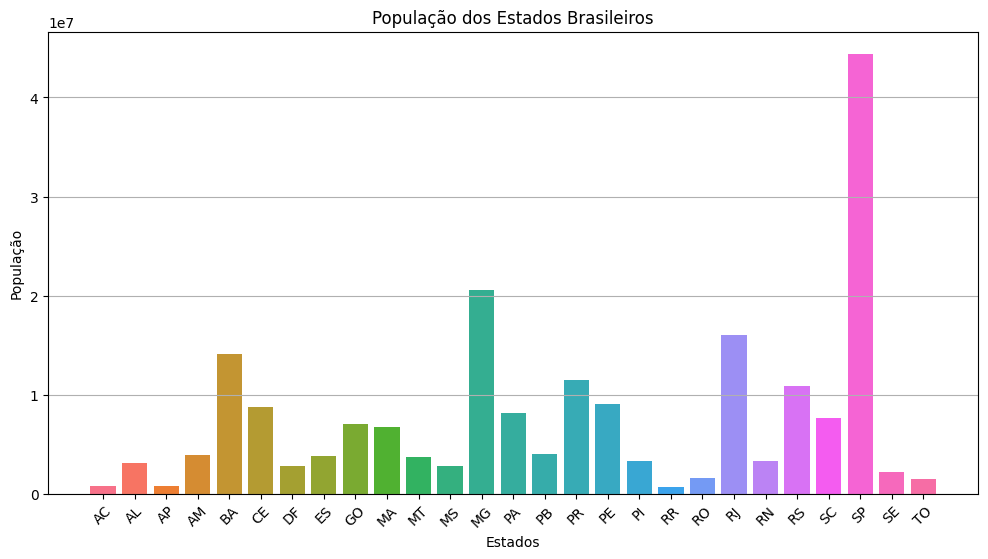

In [38]:
# Gerando uma paleta de cores
colors = sns.color_palette("husl", len(state_df))


# Gráfico de Barras
plt.figure(figsize=(12, 6))
plt.bar(state_df['sigla'], state_df['populacao'], color=colors)  # Aplicando a paleta de cores
plt.title('População dos Estados Brasileiros')
plt.xlabel('Estados')
plt.ylabel('População')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

2. Como a renda por capita varia entre os estados?

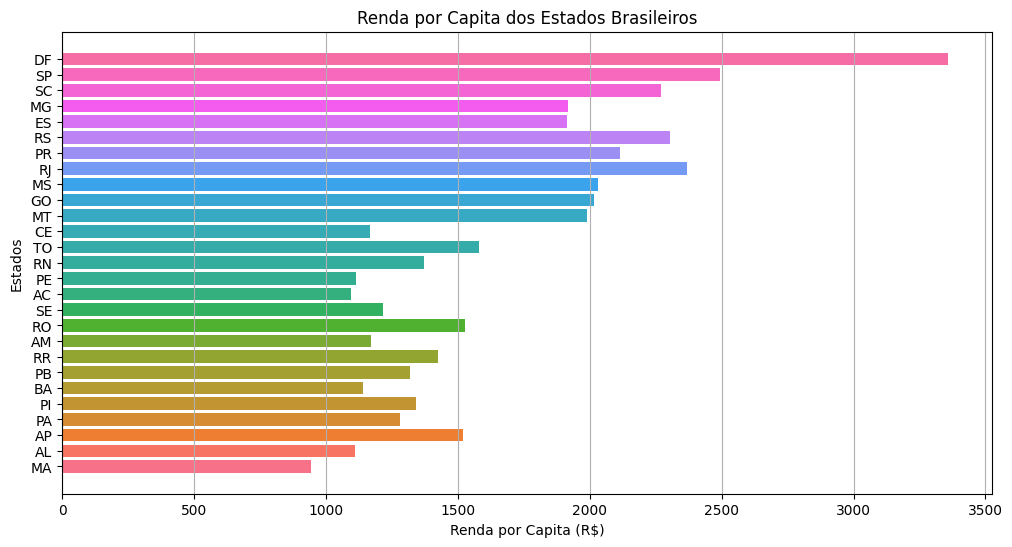

In [39]:
#Gráfico de Barras Horizontais 
# Ordenando o DataFrame com base no IDH
state_df_sorted = state_df.sort_values(by='idh')


# Gerando uma paleta de cores
colors = sns.color_palette("husl", len(state_df_sorted))


plt.figure(figsize=(12, 6))
# Usando a lista de cores geradas
plt.barh(state_df_sorted['sigla'], state_df_sorted['renda_por_capital'], color=colors)
plt.title('Renda por Capita dos Estados Brasileiros')
plt.xlabel('Renda por Capita (R$)')
plt.ylabel('Estados')
plt.grid(axis='x')


plt.show()


3. Existe uma correlação entre a área territorial dos estados e seus indicadores socioeconômicos?

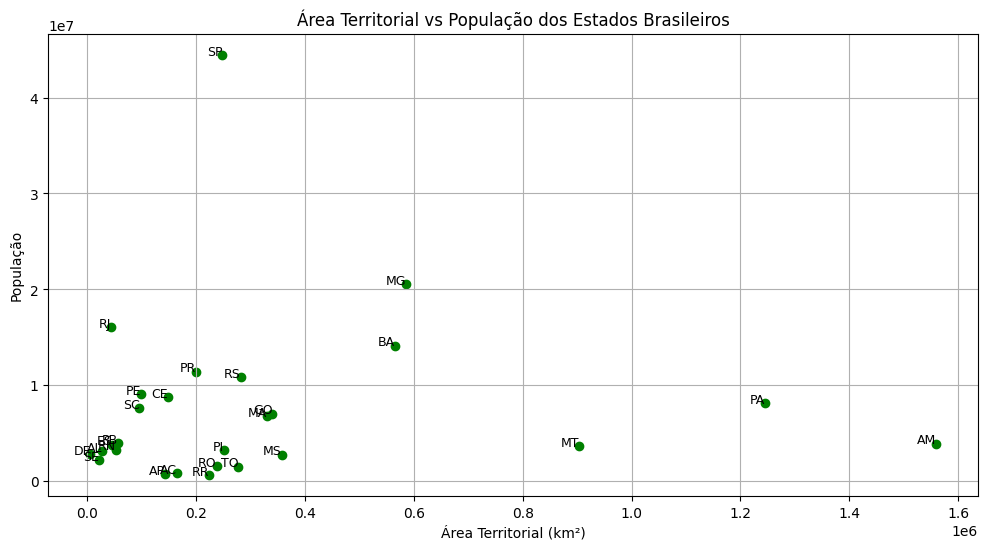

In [42]:
# Criar o gráfico de dispersão
plt.figure(figsize=(12, 6))
plt.scatter(state_df['area'], state_df['populacao'], color='green')

# Adicionar título e rótulos
plt.title('Área Territorial vs População dos Estados Brasileiros')
plt.xlabel('Área Territorial (km²)')
plt.ylabel('População')

# Adicionar rótulos aos pontos
for i in range(len(state_df)):
    plt.annotate(state_df['sigla'][i], (state_df['area'][i], state_df['populacao'][i]), fontsize=9, ha='right')

plt.grid()
plt.show()

4. Quais são os estados com as maiores disparidades na matrícula no ensino fundamental?

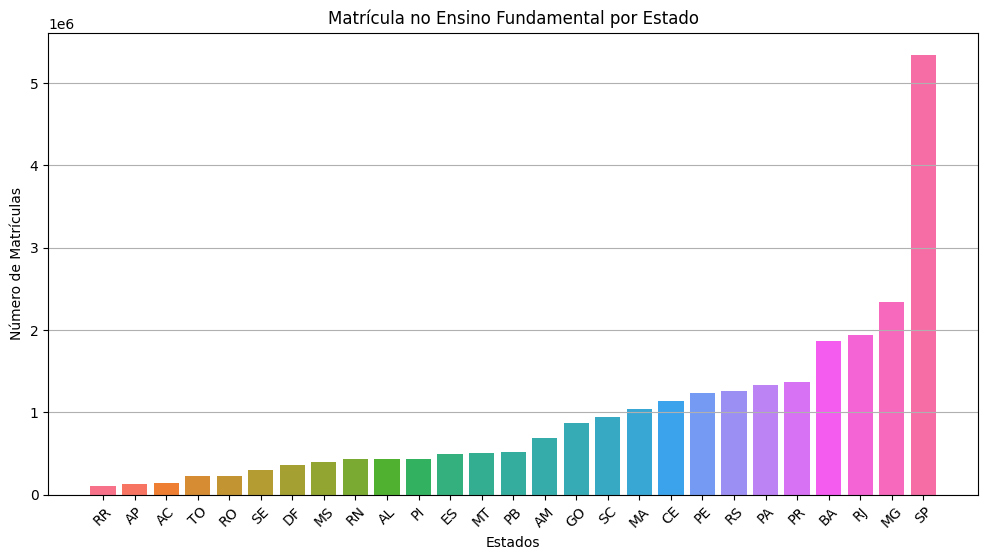

In [43]:
# Ordenar os dados se necessário
state_df_sorted = state_df.sort_values(by='matricula_ensino_fundamental')

# Gerando uma paleta de cores
colors = sns.color_palette("husl", len(state_df_sorted))

# Gráfico de Barras
plt.figure(figsize=(12, 6))
plt.bar(state_df_sorted['sigla'], state_df_sorted['matricula_ensino_fundamental'], color=colors)
plt.title('Matrícula no Ensino Fundamental por Estado')
plt.xlabel('Estados')
plt.ylabel('Número de Matrículas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

5. Como o Índice de Desenvolvimento Humano (IDH) se relaciona com outros indicadores socioeconômicos?

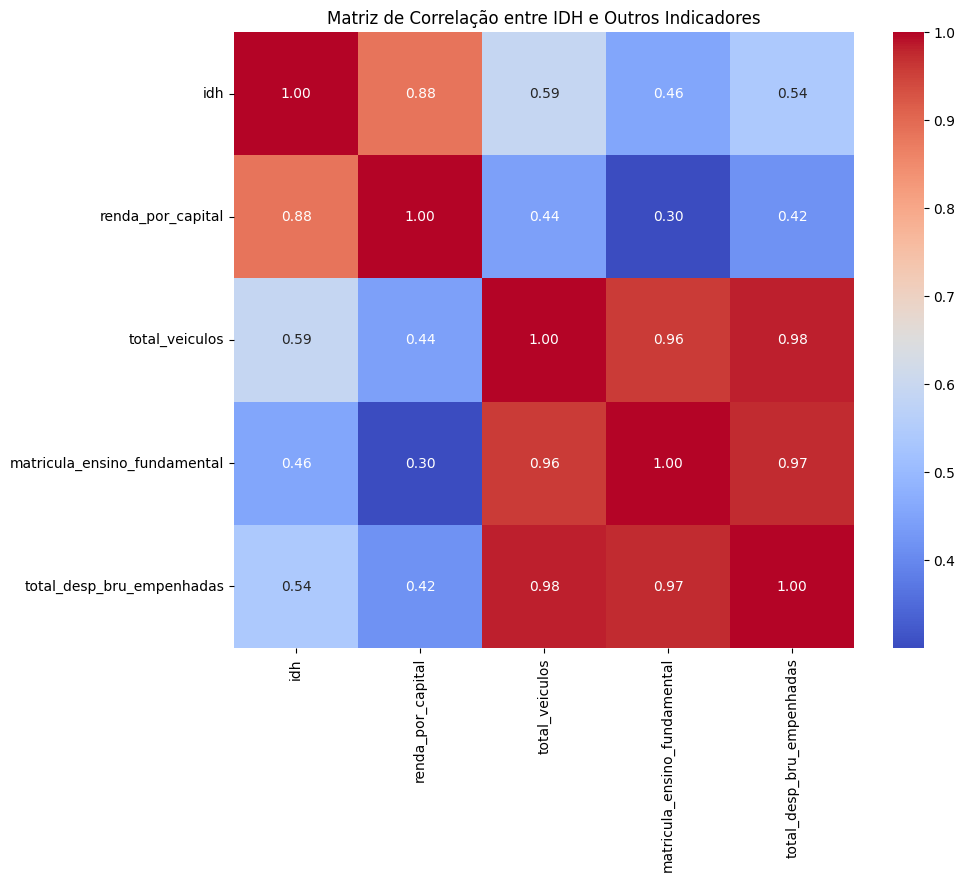

In [44]:
# Gráfico de Mapa de Calor (Heatmap)
# Calcular a matriz de correlação
correlation_matrix = state_df[['idh', 'renda_por_capital', 'total_veiculos', 'matricula_ensino_fundamental', 'total_desp_bru_empenhadas']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre IDH e Outros Indicadores')
plt.show()

In [45]:


from scipy import stats

A renda per capita varia significativamente entre os estados brasileiros com IDH acima da média e aqueles com IDH abaixo ou igual à média?

Pergunta da Hipótese
Hipótese Nula (𝐻0 ): Não há diferença significativa na renda per capita entre os estados com IDH acima da média e os estados com IDH abaixo ou igual à média.

Hipótese Alternativa (𝐻1): Há uma diferença significativa na renda per capita entre os estados com IDH acima da média e os estados com IDH abaixo ou igual à média.   com base nisso qual seria o codigo e o grafico

             Grupo  Renda Média  Desvio Padrão T-Estatística   P-Valor
0   Acima da Média  2117.076923     508.621415      5.986245  0.000003
1  Abaixo da Média  1255.785714     171.901214                        
Rejeitamos a hipótese nula (H0): Há uma diferença significativa na renda per capita entre os estados.


C:\Users\lady_\AppData\Local\Temp\ipykernel_18592\2095367669.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='idh', y='renda_por_capital', data=df, palette='Set2')


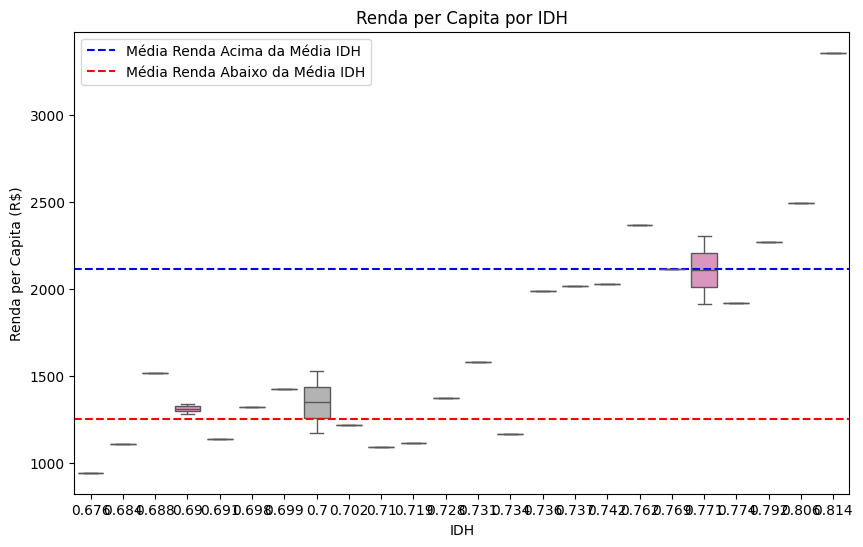

In [47]:
# Gráfico de Boxplot Comparativo
df = pd.DataFrame(dados)


# 1. Calcular a média do IDH
media_idh = df['idh'].mean()


# 2. Separar os estados em dois grupos
grupo_acima_media_idh = df[df['idh'] > media_idh]['renda_por_capital']
grupo_abaixo_media_idh = df[df['idh'] <= media_idh]['renda_por_capital']


# 3. Realizar o teste t para amostras independentes
t_stat, p_value = stats.ttest_ind(grupo_acima_media_idh, grupo_abaixo_media_idh)


# 4. Criar DataFrame para facilitar a visualização
data_visualizacao = {
    'Grupo': ['Acima da Média', 'Abaixo da Média'],
    'Renda Média': [grupo_acima_media_idh.mean(), grupo_abaixo_media_idh.mean()],
    'Desvio Padrão': [grupo_acima_media_idh.std(), grupo_abaixo_media_idh.std()],
    'T-Estatística': [t_stat, ''],
    'P-Valor': [p_value, '']
}


df_visualizacao = pd.DataFrame(data_visualizacao)


# Exibir resultados
print(df_visualizacao)


# 5. Análise das Hipóteses
alpha = 0.05  # nível de significância
if p_value < alpha:
    print("Rejeitamos a hipótese nula (H0): Há uma diferença significativa na renda per capita entre os estados.")
else:
    print("Não rejeitamos a hipótese nula (H1): Não há diferença significativa na renda per capita entre os estados.")


# 6. Visualizar os resultados usando um boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='idh', y='renda_por_capital', data=df, palette='Set2')
plt.title('Renda per Capita por IDH')
plt.xlabel('IDH')
plt.ylabel('Renda per Capita (R$)')
plt.axhline(grupo_acima_media_idh.mean(), color='blue', linestyle='--', label='Média Renda Acima da Média IDH')
plt.axhline(grupo_abaixo_media_idh.mean(), color='red', linestyle='--', label='Média Renda Abaixo da Média IDH')
plt.legend()
plt.show()